# Data Interpreter

## Packages

We use four different packages for the final analysis of our dataset. The first is pandas, which we use to work with datasets and for summary statistics. To obtain results from OLS regression, we implement statsmodels.api. Also we use matplotlib.pyplot to create plots to observe actual and predicted values and math package to use sqrt function in Root-mean-square error.

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

## Summary Statistics

First, we import the dataset in csv format with the prepared data for analysis. Then we create the summary of the dataset, which we transpose to make it more readable. We need the summary to check if the dataset need to be edited.

In [3]:
df1 = pd.read_csv('prepared_data.csv')
s1=df1.describe(include="all")
s1=s1.transpose()
print(s1)

                                          count unique  \
Year_Category                             401.0    NaN   
Počet objektivů předního fotoaparátu_cat  401.0    NaN   
Možnost paměťové karty_d                  401.0    NaN   
Voděodolný_d                              401.0    NaN   
Snímač otisků prstů_d                     401.0    NaN   
Rychlonabíjení_d                          401.0    NaN   
Dual SIM_d                                401.0    NaN   
NFC_d                                     401.0    NaN   
LTE_d                                     401.0    NaN   
5G_d                                      401.0    NaN   
Odemykání obličejem_d                     401.0    NaN   
Odolné_d                                  401.0    NaN   
Typ nabíječky_d                           401.0    NaN   
Operační systém_d                         401.0    NaN   
Sluchátkový konektor_d                    401.0    NaN   
Počet jader procesoru_cat                 401.0    NaN   
Paměť RAM_cat 

In summary, we see that the number of front camera lenses (Počet objektivů předního fotoaparátu_cat) has a maximum of two and a minimum of zero. Since we have the dataset with relatively modern phones, most have a front camera. So we create a dummy variable of the 2 lenses of the camera in the final edits of the dataset.

## Final edits of the dataset

We create the selfie function with which we create a dummy variable for two front camera lenses. The conditions in the function are that if the object is equal to 2, the selfie returns 1, in other cases it returns 0. We apply the selfie to the front camera lens column and the resulting column replaces the original one. Then we change the column name to more accurately describe the dummy variable.

In [5]:
def selfie(obj):
    if obj==2:
        return 1
    else:
        return 0
df1['Počet objektivů předního fotoaparátu_cat'] = df1['Počet objektivů předního fotoaparátu_cat'].apply(selfie)
df1.rename(columns = {'Počet objektivů předního fotoaparátu_cat':'Počet objektivů předního fotoaparátu (2 objektivy)'}, inplace = True)

## OLS model with all independent variables

To create an OLS model, we first create a dataset x containing only columns with independent variables. We create x by removing the column with the dependent variable and the auxiliary columns id and name from the original dataset via the drop function. We check summary of x to see if we have all the necessary variables. Finally, we create y that contains only a column with the dependent variable RatingH (phone rating).

In [7]:
x=df1.drop(columns=['id','Name','RatingH'])
s2=x.describe(include="all")
s2=s2.transpose()
print(s2)
y=df1['RatingH']

                                                    count         mean  \
Year_Category                                       401.0     0.917706   
Počet objektivů předního fotoaparátu (2 objektivy)  401.0     0.034913   
Možnost paměťové karty_d                            401.0     0.693267   
Voděodolný_d                                        401.0     0.401496   
Snímač otisků prstů_d                               401.0     0.770574   
Rychlonabíjení_d                                    401.0     0.708229   
Dual SIM_d                                          401.0     0.730673   
NFC_d                                               401.0     0.788030   
LTE_d                                               401.0     0.990025   
5G_d                                                401.0     0.244389   
Odemykání obličejem_d                               401.0     0.458853   
Odolné_d                                            401.0     0.371571   
Typ nabíječky_d                       

We see that the dataset x is fine and also that we already have a dummy variable for 2 front camera lenses in the dataset.

Through the OLS function from the statsmodels.api package, we get the results of the regression of the phone ratings (dependent variable) on all obtained independent variables. We then create a summary of these results with important information such as coefficient values or R-squared of the model.

In [8]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                RatingH   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2905.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:54:56   Log-Likelihood:                         -1297.5
No. Observations:                 401   AIC:                                      2651.
Df Residuals:                     373   BIC:                                      2763.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-

In the summary we see the size and significance of the coefficient of the variable. In the model for all variables, the width of the phone (Šířka_n) is significant with a positive effect on the dependent variable. Producers should therefore focus on producing less wide phones based on these results. Other features of the phones that producers should focus on are the NFC and LTE functions, the type of charger (Typ nabíječky_d) and headphone connector(Sluchátkový konektor_d), the maximum video resolution (Maximální rozlišení videa_cat), the weight of the phone (Hmotnost_n)  and frequency of the processor (Frekvence procesoru_n). All these variables except weight have a positive coefficient. The operating system (Operační systém_d) is also significant, but the dummy variable for iOS only predicts that consumers rate Apple phones more positively. Surprisingly the RAM (Paměť RAM_cat) is significant but negative.

When we look at the R-squared of the model we see a high number of 0.995.

To test the quality of the model, we create the plot of the actual values of the dependent variable and the predicted values. We use the matplotlib.pyplot package. Using its functions, we create the plot and determine the properties of the graph, such as color, line in the plot, axis names, and so on.

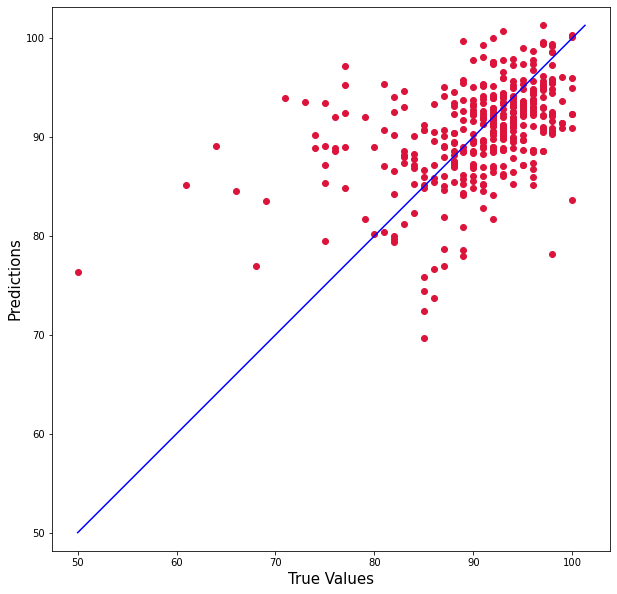

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(y, results.fittedvalues, c='crimson')
p1 = max(max(results.fittedvalues), max(y))
p2 = min(min(results.fittedvalues), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Ideally, the points in the graph would be on the line, indicating that the actual and predicted values are the same. In our case, the points are mostly close to the lines, mainly for larger predicted values. However, the smaller predicted values are farther from the line.

We also tested the model with root mean square error. This determines how much the predicted value is different from the real one. We have created a function that calculates RMSE for different models. Inside the function is formula for RMSE which is written in the code. In this case, we use the sqrt function from the math package.

In [12]:
def rmse(y,pred):
    print(math.sqrt(((y-pred)**2).mean()))
    
print(rmse(y,results.fittedvalues))

6.15178694510962
None


The RMSE value for this model is quite high. Differences in phone ratings are generally not that high.

## OLS model with important variables

Since R-squared was high for the previous model, we decided to create a model with only a few important variables.

In [13]:
x2=df1[['Voděodolný_d','Možnost paměťové karty_d','Rychlonabíjení_d','Dual SIM_d' ,'NFC_d' ,'LTE_d','Operační systém_d','Sluchátkový konektor_d' ,'Počet jader procesoru_cat' ,'Maximální rozlišení videa_cat','Uživatelská paměť_cat','Kapacita baterie_n','Rozlišení fotoaparátu_cat','Hmotnost_n','Frekvence procesoru_n' ,'Velikost displeje_n','price']]
model2 = sm.OLS(y, x2)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                RatingH   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3830.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                        0.00
Time:                        22:00:06   Log-Likelihood:                         -1347.7
No. Observations:                 401   AIC:                                      2729.
Df Residuals:                     384   BIC:                                      2797.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

According to the results of this model, producers should also focus on the NFC and LTE functions, headphone connector(Sluchátkový konektor_d), the maximum video resolution (Maximální rozlišení videa_cat) and frequency of the processor (Frekvence procesoru_n). These variables remained with a positive and significant coefficient. The possibility of a memory card (Možnost paměťové karty_d) and the size of the display (Velikost displeje_n) also gained a significant and positive coefficient in this model. On the other hand, the battery capacity (Kapacita baterie_n), camera resolution (Rozlišení fotoaparátu_cat) and price are negative and significant. The dummy variable for iOS (Operační systém_d) is still significant. The R-squared has not changed significantly, it is 0,994.

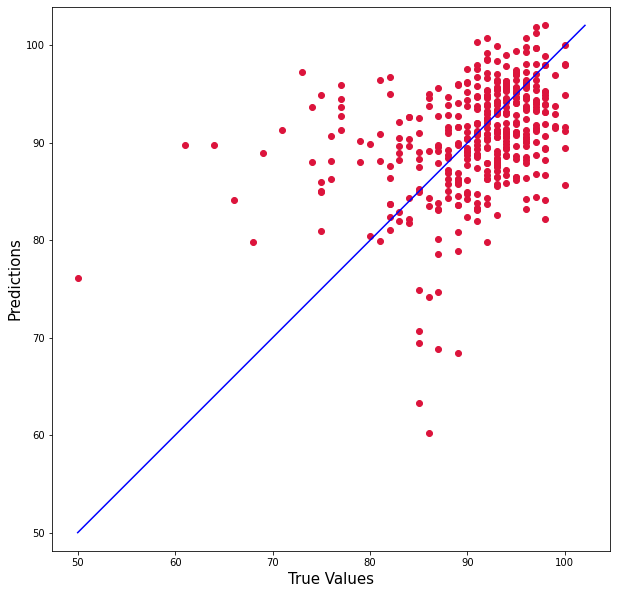

6.972115090445969
None


In [15]:
plt.figure(figsize=(10,10))
plt.scatter(y, results2.fittedvalues, c='crimson')
p1 = max(max(results2.fittedvalues), max(y))
p2 = min(min(results2.fittedvalues), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print(rmse(y,results2.fittedvalues))

The plot for the second model does not differ significantly from the first. However, RMSE rose significantly.

## OLS model without correlated variables

In the last model, we first identify independent variables that are strongly correlated with each other and then we exclude some of them from the model.

The first command creates a correlation matrix with mutual correlations of variables. Subsequently, we create an auxiliary function that returns numbers greater than or equal to 0.5. We apply this function to the correlation matrix so that only higher correlations are displayed.

In [16]:
correla = x.corr()

def correl(obj):
    if abs(obj)>=0.5:
        return obj
    else:
        return 0
    
corrmax= correla.applymap(correl)
print(corrmax)

                                                    Year_Category  \
Year_Category                                            1.000000   
Počet objektivů předního fotoaparátu (2 objektivy)       0.000000   
Možnost paměťové karty_d                                 0.000000   
Voděodolný_d                                             0.000000   
Snímač otisků prstů_d                                    0.000000   
Rychlonabíjení_d                                         0.000000   
Dual SIM_d                                               0.000000   
NFC_d                                                    0.000000   
LTE_d                                                    0.000000   
5G_d                                                    -0.516203   
Odemykání obličejem_d                                    0.000000   
Odolné_d                                                 0.000000   
Typ nabíječky_d                                          0.000000   
Operační systém_d                 

Based on the correlation matrix, we drop the bluetooth version (Verze Bluetooth_cat), resistance (Odolné_d), display size (Velikost displeje_n), number of rear camera lenses (Počet objektivů zadního fotoaparátu_cat), RAM (Paměť RAM_cat) and weight (Hmotnost_n) from the dataset x using the drop function.

In [18]:
x3=x.drop(columns=['Verze Bluetooth_cat','Odolné_d','Velikost displeje_n','Počet objektivů zadního fotoaparátu_cat','Paměť RAM_cat','Hmotnost_n'])
model3 = sm.OLS(y, x3)
results3 = model3.fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:                RatingH   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3403.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                        0.00
Time:                        22:42:13   Log-Likelihood:                         -1317.2
No. Observations:                 401   AIC:                                      2678.
Df Residuals:                     379   BIC:                                      2766.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-

In this models, the positive and significant coefficients have the NFC and LTE functions, headphone connector(Sluchátkový konektor_d), the maximum video resolution (Maximální rozlišení videa_cat), frequency of the processor (Frekvence procesoru_n) and the width of the phone (Šířka_n). The battery capacity (Kapacita baterie_n) and waterproof (Voděodolný_d) are negative and significant. The dummy variable for iOS (Operační systém_d) is still significant. The R-squared is same as for first model.

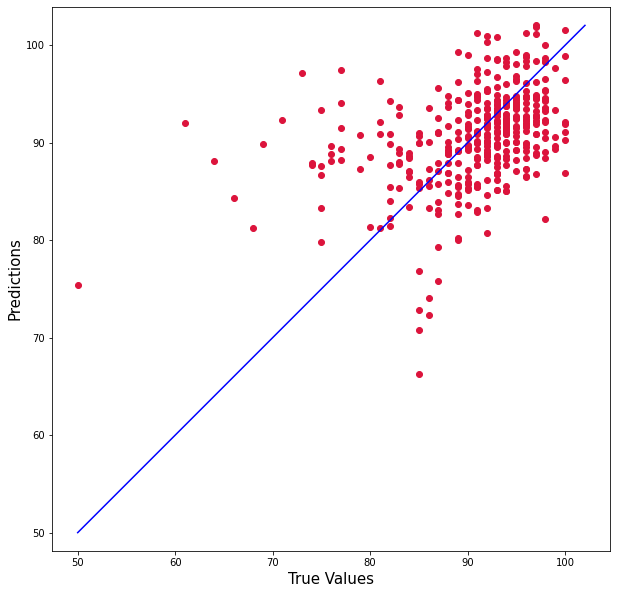

6.461901859719247
None


In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y, results3.fittedvalues, c='crimson')
p1 = max(max(results3.fittedvalues), max(y))
p2 = min(min(results3.fittedvalues), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print(rmse(y,results3.fittedvalues))

The plot for the third model does not differ significantly from the first and second. Third value of RMSE is between first and second RMSE.

## Conclusion

Based on our three models and overall analysis, producers should focus on the phone's parameters the NFC and LTE functions, headphone connector(Sluchátkový konektor_d), the maximum video resolution (Maximální rozlišení videa_cat), frequency of the processor (Frekvence procesoru_n) and the width of the phone (Šířka_n). These parameters have a significant impact on the evaluation of phones in all three models. Thus, wise producers should improve them in their offered smartphones.